**Working With Multiple Files**

Now, what if we want to look at more than just the file we've been considering. What if we want to load all of the segmetents to see what they look like on average?

In the past we've been using text and opening and closing files but here we don't have a file list. Instead, we want to interact with the filesystem directly using the os library. os will not only let us look inside directories, it will also take care of what is a file, a folder, etc so that we don't ahve to be so careful about conventions.

Lets start by looking at all the folders in the root directory, that is the direcotry where the point clouds are stored. It may be helpful to open up the Files browser in the tab on the left hand side.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
pip install open3d -q

     |████████████████████████████████| 188.4MB 83kB/s 


In [3]:
import os

root = root = '/content/drive/MyDrive/Colab Notebooks/XN_Segmentation of 3D Points/Cloud Sample Data/'

print("Directories in the root directory:")
os.listdir(root)

Directories in the root directory:


['1608332814003',
 '1608335007385',
 '1608343408802',
 '1608349012229',
 '1608340797805',
 '1608347279931',
 '1608337821692']

In [4]:
import numpy as np 
import open3d as o3d

pcd_faces = []

for folder in os.listdir(root):
  face_path = os.path.join(root, folder, "face_segment.pcd") 
  pcd_faces += [np.asarray(o3d.io.read_point_cloud(face_path).points)]


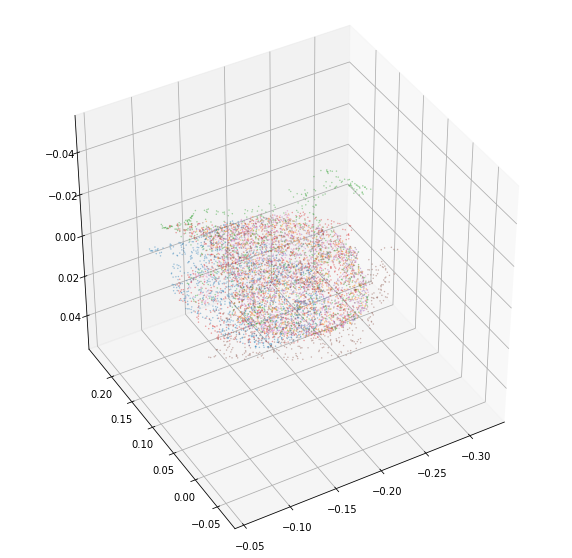

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

%matplotlib inline 

fig = plt.figure(figsize=[10,10])
ax = plt.subplot(projection='3d')

for face in pcd_faces:
  number_of_rows = face.shape[0]
  face_size = 1000

  random_indices = np.random.choice(number_of_rows, size=face_size, replace=False)
  face_samp = face[random_indices,:]
  plt.scatter(face_samp[:,0], face_samp[:,1], face_samp[:,2], alpha=.5, marker='.')

ax.view_init(-140, 120)          # Rotate the axis for a better view
plt.draw()

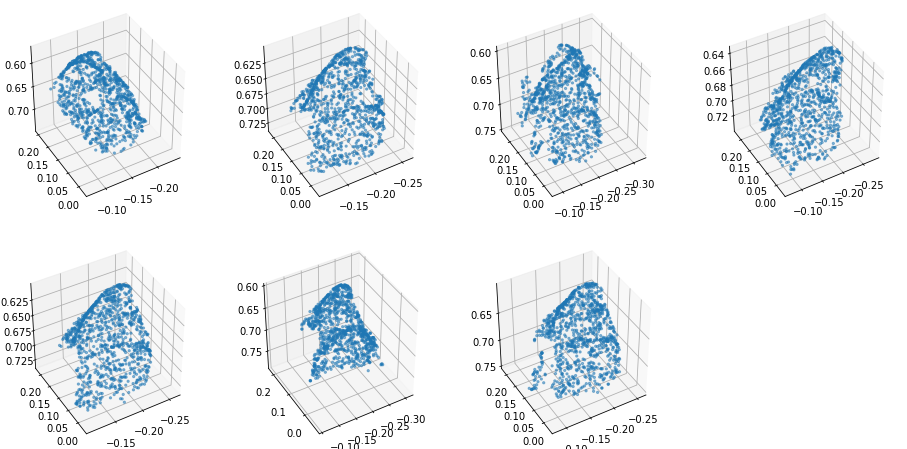

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import statistics

%matplotlib inline 

fig = plt.figure(figsize=[4*4,2*4])

L = len(pcd_faces)
c = int(np.floor(L/4))+1
r = L%4  +1 

for i, face in enumerate(pcd_faces):

  ax = fig.add_subplot(c , r ,i+1, projection='3d')
  number_of_rows = face.shape[0]
  face_size = 1000

  random_indices = np.random.choice(number_of_rows, size=face_size, replace=False)
  face_samp = face[random_indices,:]
  ax.scatter(face_samp[:,0], face_samp[:,1], face_samp[:,2], alpha=.5, marker='.')
  ax.view_init(-140, 120)          # Rotate the axis for a better view

plt.draw()



In [20]:
 from sklearn import preprocessing
 widths=[]
 lengths=[]
 sums=[]
for i, value in enumerate(pcd_faces):
  min_x=np.min(value[:,0]) #calculate average length
  max_x=np.max(value[:,0])
  widths.append(max_x-min_x)
  average_width=round(np.mean(np.array(widths)),4)

# get minimum and max of y
  min_y=np.min(value[:,1]) 
  max_y=np.max(value[:,1])
  lengths.append(max_y-min_y)
  average_length=round(np.mean(np.array(lengths)),4) 
  
  #calculate average length
  sum_of_points=np.sum(value)
  sums.append(sum_of_points)
  mean_point=round(np.mean(np.array(sums)),4)
  mean_points=mean_point.reshape(1, -1)
  mean_points_Norm=preprocessing.normalize(mean_points)
    #print x values
#print("The minimum x value is :", min_x)
#print("The maximum x value is :", max_x)
print("The average width is :", average_width)
 
    #print y values
#print("The minimum y value is :", min_y)
#print("The maximum y value is :", max_y)
print("The average length is:",average_length)

    #print sum of points
print(mean_points_Norm)
print(mean_point)
#print(sums)

The average width is : 0.1907
The average length is: 0.2487
[[1.]]


In [10]:
Z_value=[]
for i, value in enumerate(pcd_faces):
  min_z=np.min(value[:,2])
  max_z=np.max(value[:,2])
  Z_value.append(max_z-min_z)
  average_z=round(np.mean(np.array(Z_value)),4)
#print(average_z)
print(max_z)


0.74508816


**Statistics:**

**Average dimensions of a face:** 6-7 inches in width and 8-9 inches in length which equal to 0.1524 to 0.1778 meter in width and 0.2032-0.2286 in length

**Our statistcs are:**
 
The average width is : 0.1907
The average height is: 0.2486
The mean number of points: 28237.8007

